In [ ]:
"""The final plot solution is 
    1. seaborn
    2. plt.style.context(['science',"ieee",'no-latex'])
    3. matplotlib adjust the details
    4.inkscape manually adjust
    """

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
#//plt.style.use('science')

import numpy as np


def model(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))
    


pparam = dict(xlabel='Voltage (mV)', ylabel='Current ($\mu$A)')

x = np.linspace(0.75, 1.25, 201)

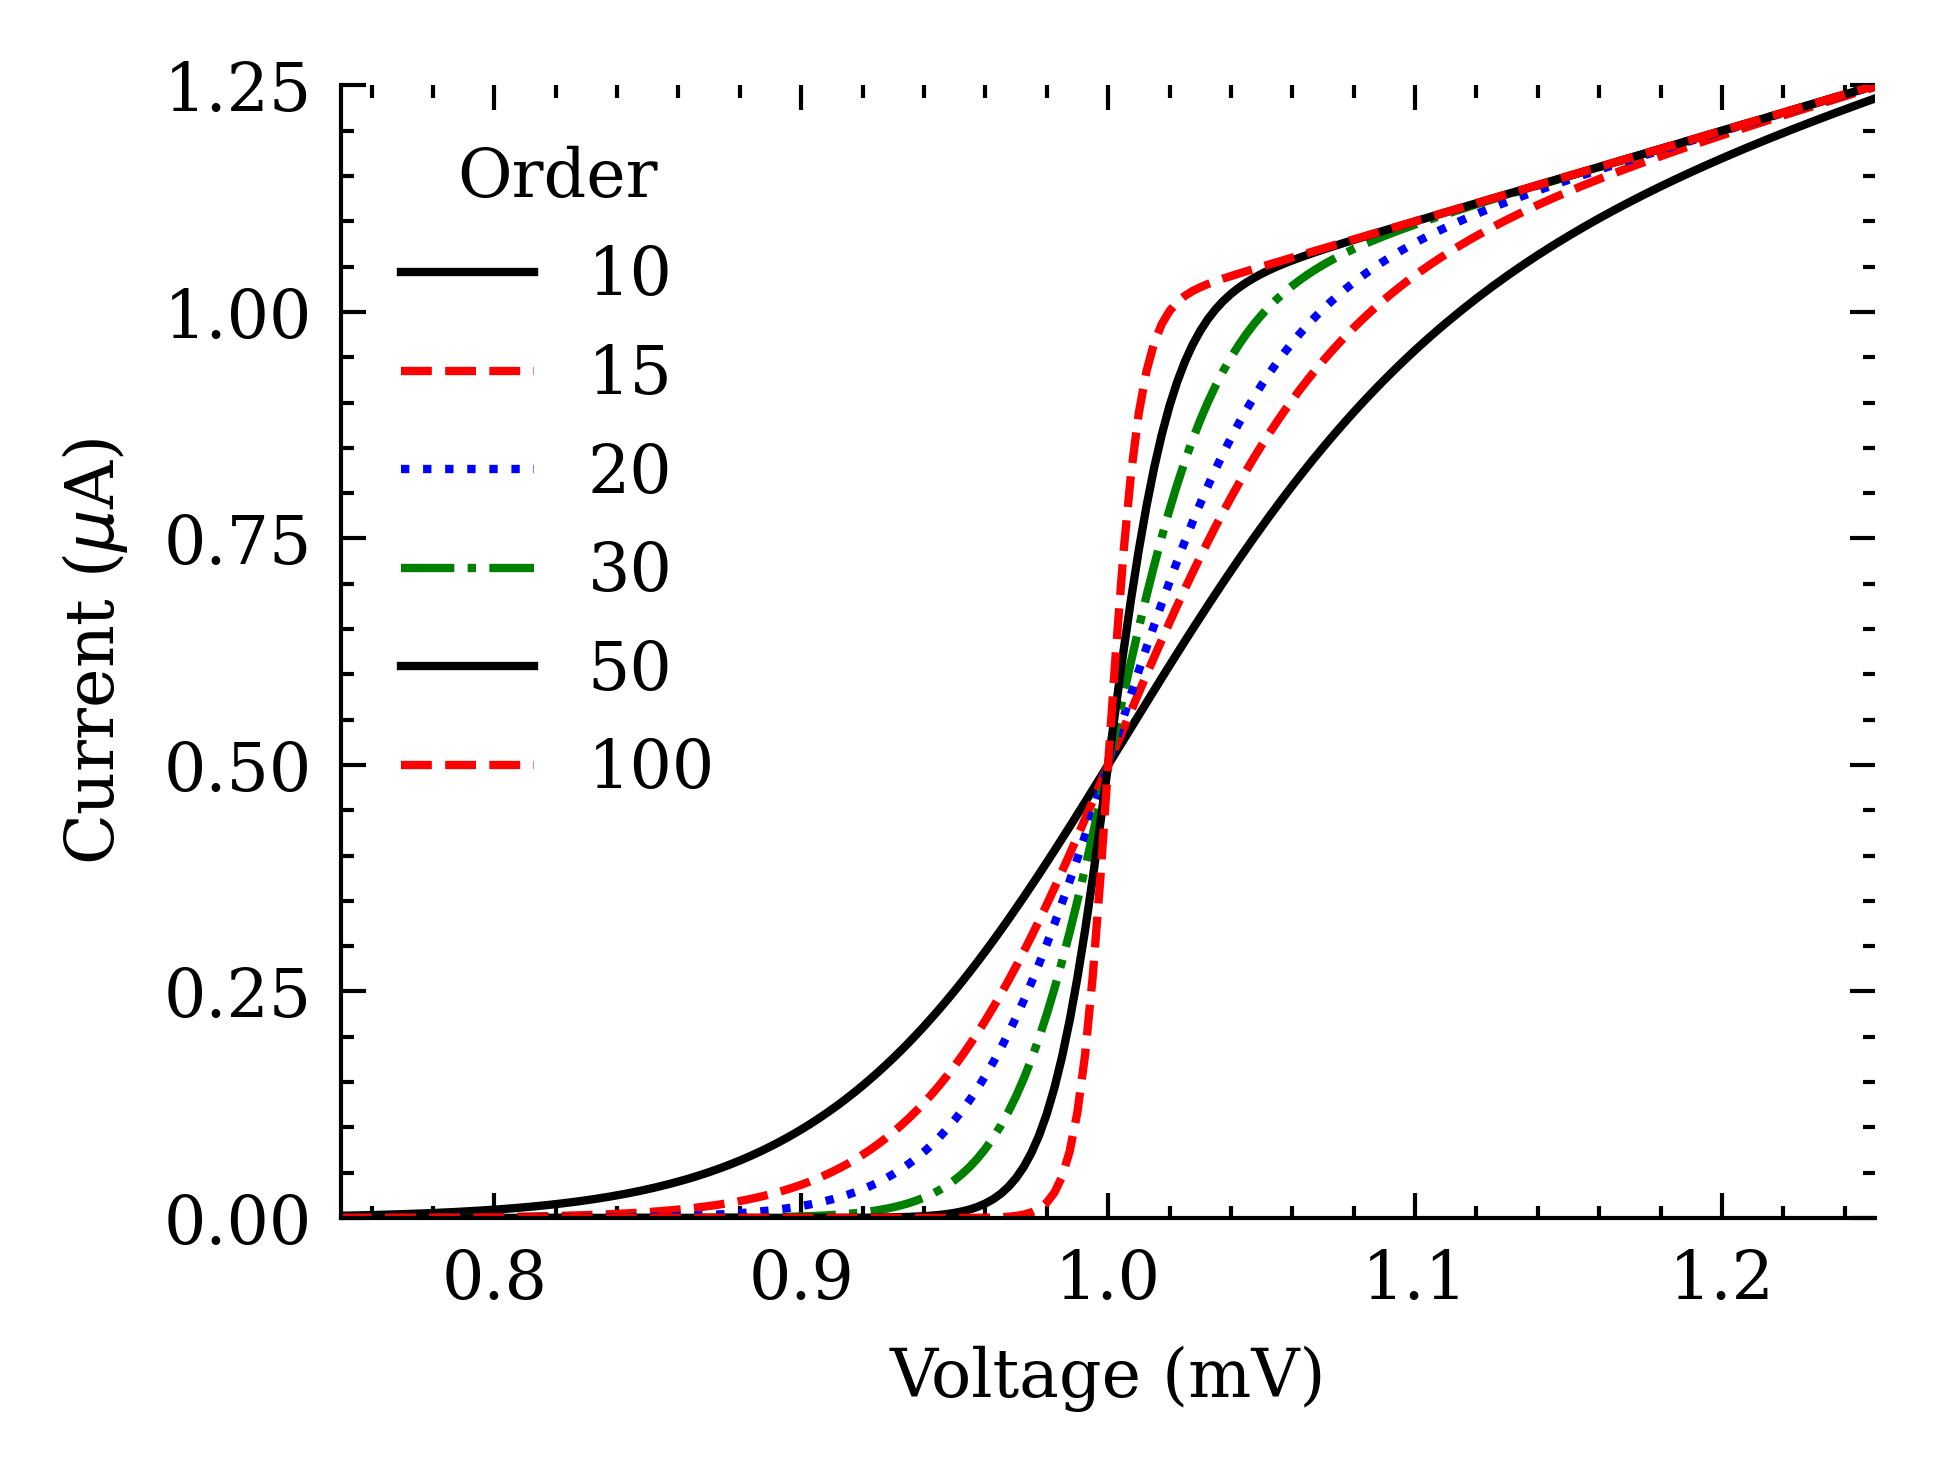

In [3]:
with plt.style.context(['science',"ieee",'no-latex']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    sns.despine()
    fig.savefig('figures/fig1.pdf')
    fig.savefig('figures/fig1.jpg', dpi=300)

In [25]:
def lines_plot( X, Y=None ,xyparam= None, style = ['science',"nature",'no-latex'],**pparam):
    """Plot lines togethear in scientific style, see more color circle in 
       https://github.com/garrettj403/SciencePlots/wiki/Gallery 

    Args:
        x (list): x-axis ID values
        Y (list[ list ]): y-axis values-list
        xyparam：
            xylables (dict(xlabels=,ylabel =), optional): _description_. Defaults to None.
            can add more properties , e.g.  xlim, ylim, xscale, yscale...
        style (list, optional): style name list, can add more color circle. Defaults to ['science',"nature",'no-latex'].
        pparam：
            save_path (str, optional): basename of save path, without suffix. Defaults to None.
            legend_title (str, optional): _description_. Defaults to None.
            legend_labels (list, optional): _description_. Defaults to None.
    """    
    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    # todo FIX this bug, unanno these will cause problems
    # if has_one_axis(X):
    #     X = [X]
    # if Y is None:
    #     X, Y = [[]] * len(X), X
    # elif has_one_axis(Y):
    #     Y = [Y]
    # if len(X) != len(Y):
    #     X = X * len(Y)

    kwargs = dict(ax=None, save_path = None,lgd_title =None, lgd_labels=None,title= None,
                errorbands = ([None]*len(X),None))
    kwargs.update(pparam)

    # Core plot function
    # light_colors = ['dodgerblue','dodgerblue','dodgerblue','dodgerblue','dodgerblue']
    with plt.style.context(style):
        if kwargs["ax"] is not None:
            ax = kwargs["ax"]
        else:
            fig, ax = plt.subplots()    

        for i in range(len(Y)):
            # print(X,"\n",Y)
            ax.plot(X, Y[i], label=kwargs["lgd_labels"][i] if kwargs["lgd_labels"] else i )
            if kwargs["errorbands"][0][i] is not None and kwargs["errorbands"][1][i] is not None:
                #// print(kwargs["errorbands"][0][i], kwargs["errorbands"][1][i])
                ax.fill_between(X, kwargs["errorbands"][0][i], kwargs["errorbands"][1][i], alpha=0.2, lw=0)
        ax.legend(title=kwargs["lgd_title"])
        ax.autoscale(tight=True)
        if xyparam: ax.set(**xyparam)

        if kwargs["ax"]:
            fig.savefig(f'{kwargs["save_path"]}.svg')
            fig.savefig(f'{kwargs["save_path"]}.jpg', dpi=300)
        


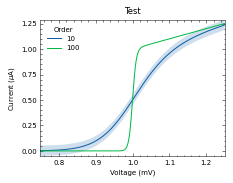

In [26]:
p_range = [10,100]#[10, 15, 20, 30, 50, 100,150,250,400,600,900]
Y = [model(x, p) for p in p_range ]
Y_error_floor = [model(x, p)-0.05 if p ==10 else None for p in p_range ]
Y_error_ceil = [model(x, p)+0.05 if p ==10 else None for p in p_range ]

xyparam = dict(xlabel='Voltage (mV)', ylabel='Current ($\mu$A)',title ="Test",)
pparam = dict(xlabel='Voltage (mV)', ylabel='Current ($\mu$A)',
            save_path = "figures/fig1",lgd_title ="Order",lgd_labels=p_range, 
            errorbands = (Y_error_floor,Y_error_ceil))


lines_plot(x,Y,xyparam,**pparam)

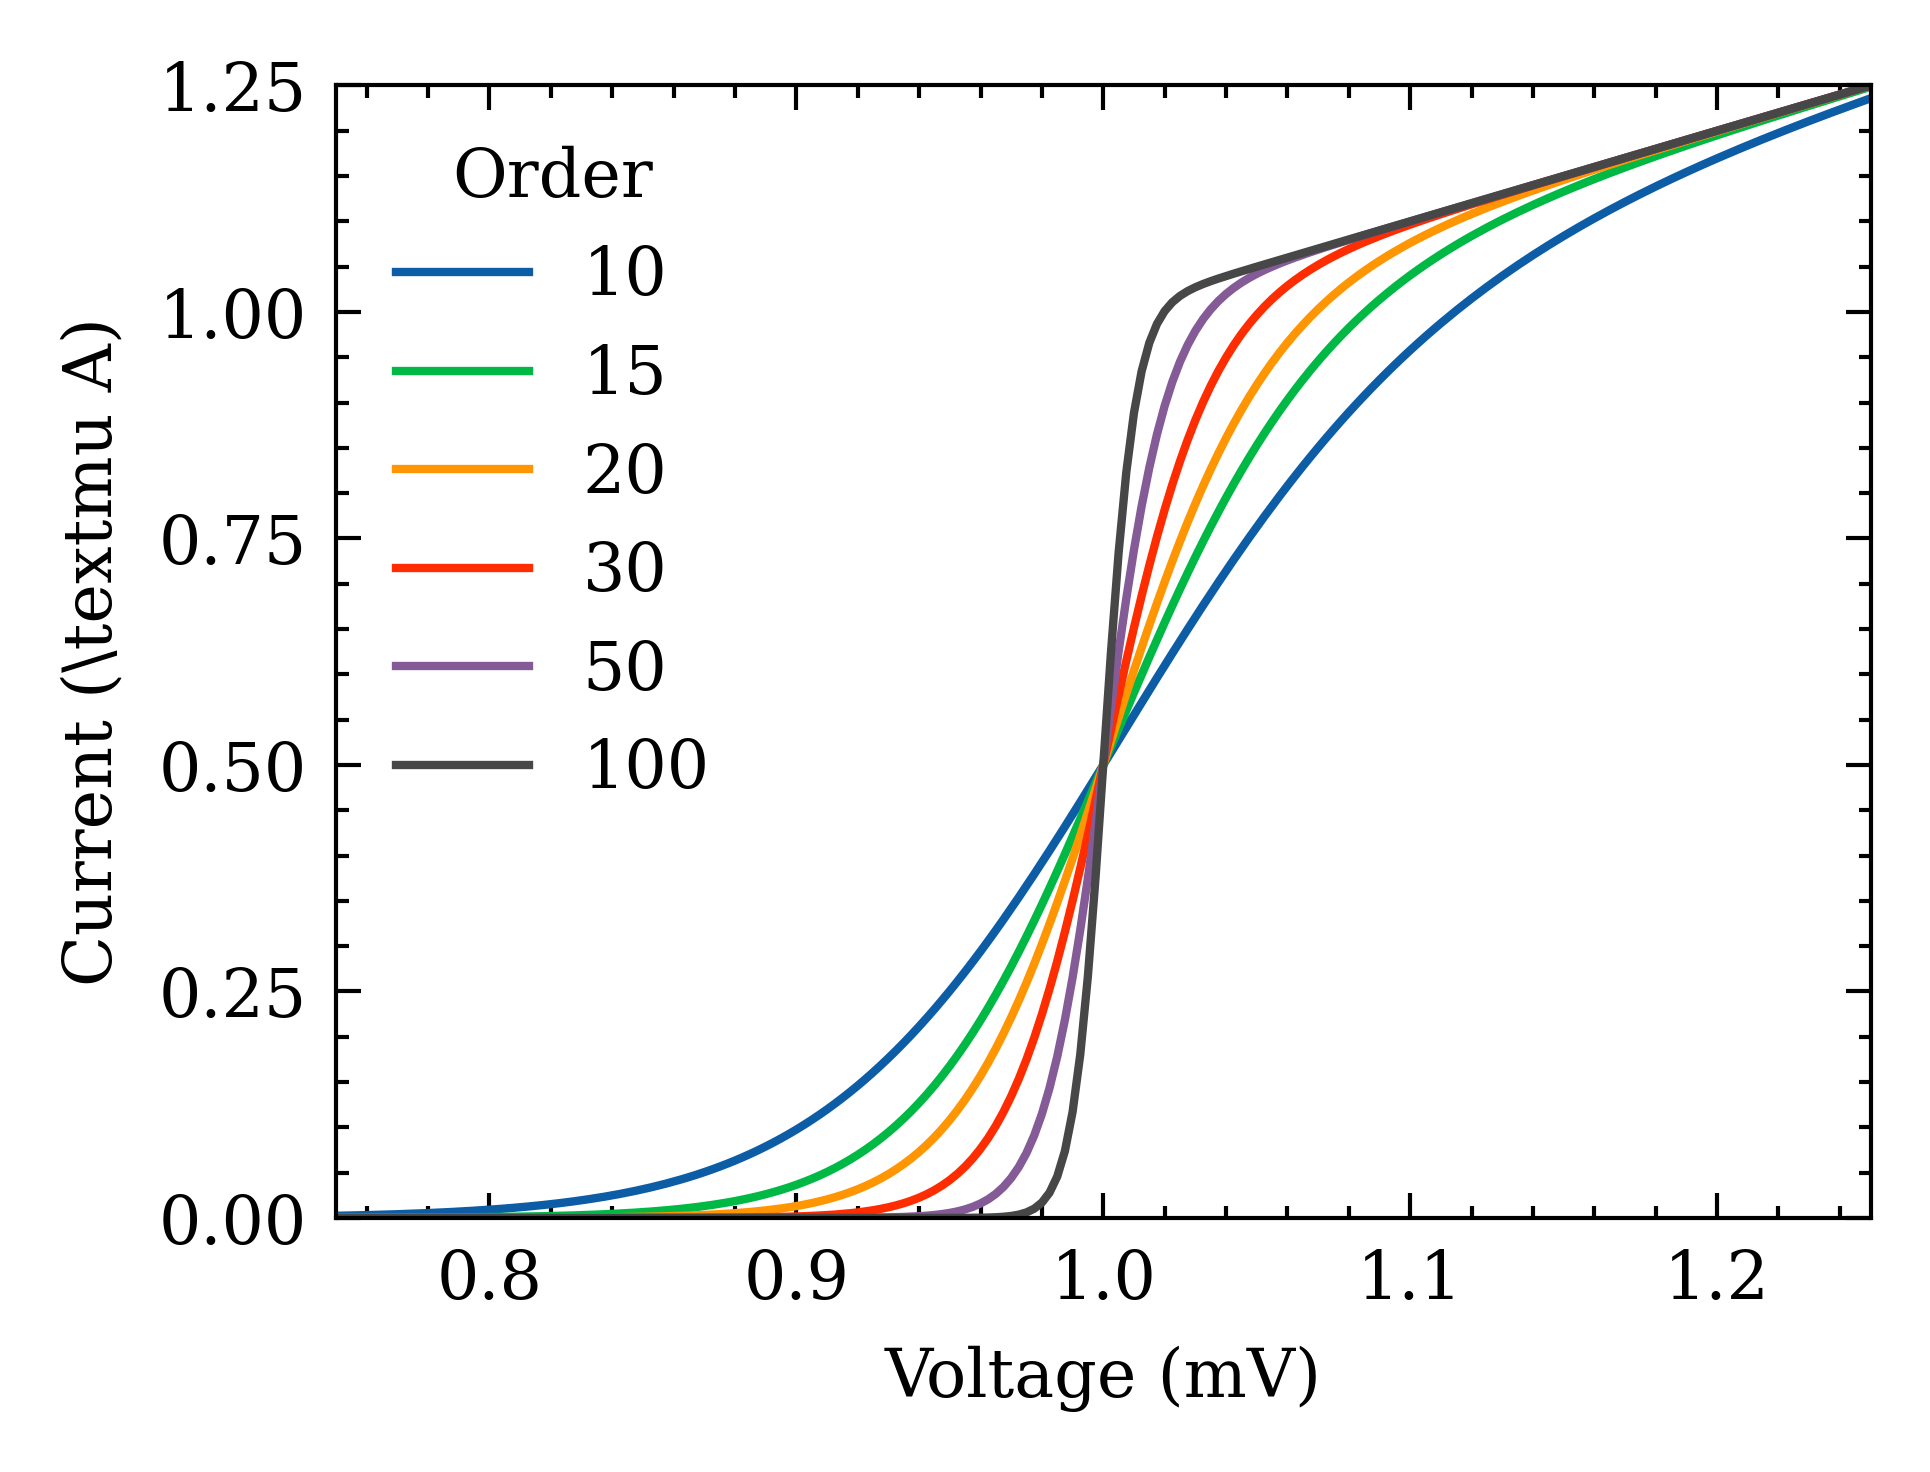

In [27]:
with plt.style.context(['science', 'ieee', 'std-colors','no-latex']):
    
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    # Note: $\mu$ doesn't work with Times font (used by ieee style)
    ax.set_ylabel(r'Current (\textmu A)')  
    fig.savefig('figures/fig2b.pdf')
    fig.savefig('figures/fig2b.jpg', dpi=300)

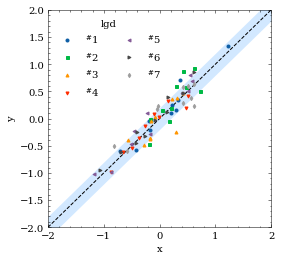

In [22]:
with plt.style.context(['science', 'scatter','no-latex']):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot([-2, 2], [-2, 2], 'k--')
    ax.fill_between([-2, 2], [-2.2, 1.8], [-1.8, 2.2],
                    color='dodgerblue', alpha=0.2, lw=0)
    for i in range(7):
        x1 = np.random.normal(0, 0.5, 10)
        y1 = x1 + np.random.normal(0, 0.2, 10)
        ax.plot(x1, y1, label=r"$^\#${}".format(i+1))
    lgd = "lgd"#r"$\mathring{P}=\begin{cases}1&\text{if $\nu\geq0$}\\0&\text{if $\nu<0$}\end{cases}$"
    ax.legend(title=lgd, loc=2, ncol=2)
    xlbl = "x"# r"$\log_{10}\left(\frac{L_\mathrm{IR}}{\mathrm{L}_\odot}\right)$"
    ylbl = "y"#r"$\log_{10}\left(\frac{L_\circledast}{\mathrm{L}_\odot}\right)$"
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    fig.savefig('figures/fig3.pdf')
    fig.savefig('figures/fig3.jpg', dpi=300)